# GRIP #Nov2021

**Author : Janvi Nandre**

**Task1 : Prediction using supervised ML**

**Level : Beginner**

**Language : Python**

**Environment : Google Collab Notebook**

**Task description** :Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.
What will be predicted score if a student study for 9.25 hrs in a day?

Dataset :  http://bit.ly/w-data.

##Data Preparation

In [22]:
#import required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# import dataset

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
# print first 5 rows

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# print number of rows and columns

df.shape

(25, 2)

In [7]:
# print summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# basic quantative descriptions

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization

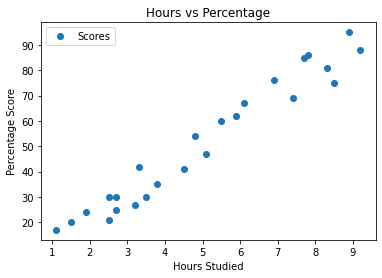

In [9]:
# visualize the data by plotting graph

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**The graph shows that there is a positive linear relation between the number of hours studied and percentage of score.**



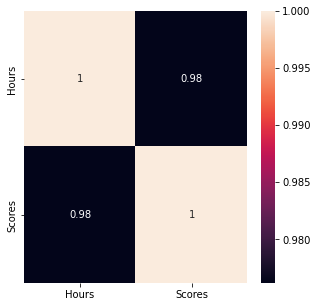

In [23]:
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

##Linear Regression Model

In [26]:
# splitting dataset into training and testing

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
# training our model

from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

In [12]:
# training our model using training set

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

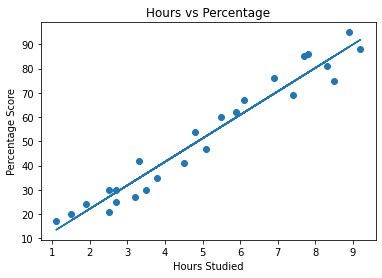

In [13]:
# plot the regression graph

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [27]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Evaluation on training set

print(regressor.score(X_train, y_train))

0.9491209376364416


In [15]:
# Evaluation on testing set

print(regressor.score(X_test, y_test))

0.9678055545167994


In [28]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,17.350010
1,27,33.809542
2,69,74.474271
3,30,27.032088
4,62,59.951153


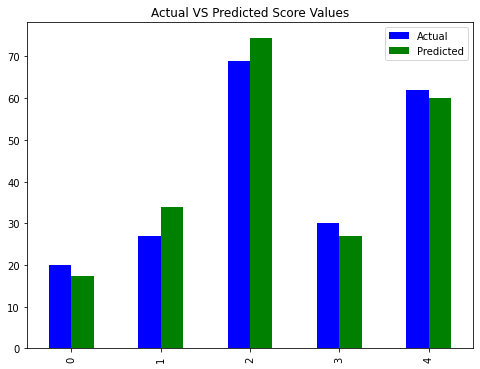

In [31]:
data.plot(kind='bar',figsize=(8,6), color=["B", "G"], title= "Actual VS Predicted Score Values")

In [36]:
# prediction for 9.25 hours
 
print('Score of student who studied for 9.25 hours a day is ', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day is  [92.38611528]


##Data Evaluation

In [39]:
# Find MSE , R_SQUARE value
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = (mean_absolute_error(y_test, y_pred))
print("MAE :",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE :",rmse)

r2 =  r2_score(y_test, y_pred)
print("R-Square :",r2)

MAE : 3.99011247084385
RMSE : 4.3901305793434595
R-Square : 0.95135966458791


**The accuracy of the model is 95.13% and the mean absolute error is 3.99%.**